##  Modelling of Population Dynamics

In the following, we will consider a population model that takes into account that the growth rate actually depends on the size of the population. If the population is small, it will increase while if it is too large, it will decrease. This is often referred to as the logistic growth model [[3]](#3). Let $t$ be time and $N$ be a measurement of the population in terms of numbers or biomass. The constant $r$ is the intrinsic growth rate while $a$ >0 is a constant related to the decline in population.  The model reads:

$$
\begin{equation}
\label{eq1} \tag{1}
\frac{dN}{dt}=(r - aN)N, \qquad N(0) = N_0
\end{equation}
$$

This is often rewritten as:
$$
\begin{equation}
\label{eq2} \tag{2}
\frac{dN}{dt}=r(1-\frac{N}{K}), \qquad N(0)=N_0 
\end{equation}
$$

where $K = r/a$ or $K$ = ${r}\over{a}$. $K$ has same unit as $N$.

As shown in (x), it is in this case possible to derive an exact solution to this nonlinear ordinary differential equation by using the method of separation of variables.

$$
\begin{equation}
\label{eq3} \tag{3}
N(t)= \frac{N_0K}{N_0+(K-N_0)\exp(-rt)}
\end{equation}
$$

We will consider a fish population in a lake. N will represent the biomass in kg and we will consider initial values for $N_0$ in the range 0 – 20000 kg. The time unit will be months. $K$ = 10000 kg.  The intrinsic growth rate is 0.6 per year or with the chosen time unit: 0.6/12 per month. One can start with a timeframe of 15 years or more for studying how the population evolves in time.






### Exercise 1.1 - How is decline in population incorporated in the model?
What is the purpose of trying to model the decline in population as $-aN$ in the logistic growth model?


### Exercise 1.1 - Solution


This is how one can incorporate the effect that overpopulation can lead to a reduction in population due too lack of resources.  Since $a$ >0, this term will become more negative if $N$ is large and if $N$ is sufficiently large, $\frac{DN}{dt}$ will become negative that will lead to a decrease in population. However as $N$ is decreased again, ${DN}\over{dt}$  will become less and less negative which will lead a reduction in how fast the population declines.


See equation ([1](#eq1))

### Exercise 1.2 – Exact Solution vs Numerical Approximations.

In the figure below, a code is shown that uses the exact solution to simulate forward in time how the population will evolve. Use this code framework as basis and implement the Euler method and the fourth order Runge Kutta method. It can be beneficial to use functions here.
Then set the initial biomass $N_0$  to 20000 kg. Vary the timestep using the values 18, 12, 6 and 1 months and compare the results that is provided by the two numerical methods and how they approach the exact solution. What can be observed and why? Discuss this in the report and illustrate this with appropriate plots.  What is the recommended timestep for each method?  The code you have developed must be included in the report notebook.


### Exercise  1.2 - Exact Solution vs Numerical Approximations - Less Advanced - Without Functions

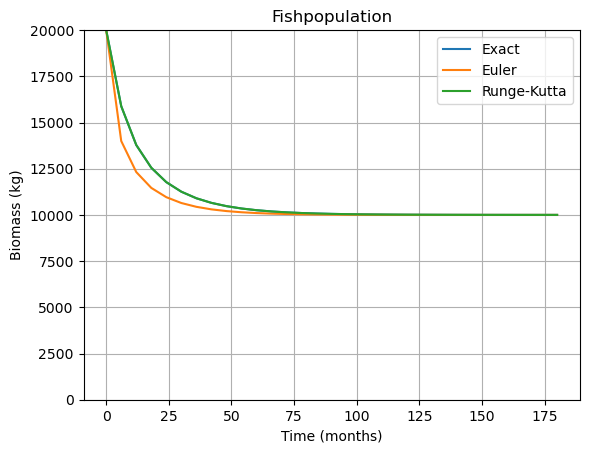

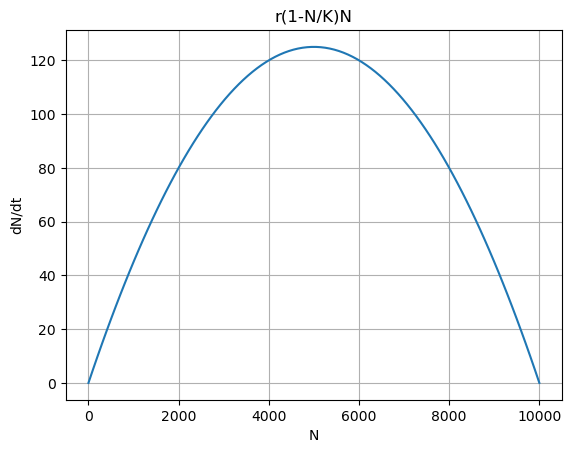

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import math

timestep = 6  #  Use month as timeunit.

starttime = 0
endtime = 12*15

K = 10000   # K = 10000 kg


r = 0.6/12  # 0.71/12 was used in the Boyce & DiPrima book (unit per time)

N0  = 20000 # Initial  biomass in kg

T1=[]
YExact=[]
Y1=[]
Y2=[]


t = starttime
y = N0
y1= N0
y2= N0

YExact.append(y)
Y1.append(y1)
Y2.append(y2)

T1.append(t)


while (t<endtime):
    t = t+timestep 
   
    
    y=N0*K/(N0+(K-N0)*math.exp(-r*t))  # Exact solution
    
    y1 = y1+timestep*(r*(1-y1/K)*y1)  # Euler method
    if y1<0:
        y1=0
        
     # 4th order Runge-Kutta method
    
    K0=timestep*r*(1-y2/K)*y2
    K1=timestep*r*(1-(y2+0.5*K0)/K)*(y2+0.5*K0)
    K2=timestep*r*(1-(y2+0.5*K1)/K)*(y2+0.5*K1)
    K3=timestep*r*(1-(y2+K2)/K)*(y2+K2)
    
    y2 = y2+1/6*(K0+2*K1+2*K2+K3)
    
    
    
    T1.append(t)
    YExact.append(y)
    Y1.append(y1)
    Y2.append(y2)
    
    
plt.plot(T1,YExact,T1,Y1,T1,Y2)    
plt.title('Fishpopulation') 
plt.xlabel('Time (months)')
plt.ylabel('Biomass (kg)')
plt.ylim(ymin=0,ymax =20000)
plt.grid(True)
plt.legend(['Exact','Euler','Runge-Kutta'])
plt.show()
    




## section where we plot dN/dt as function of N

X = np.linspace(0,10000,100)
DNDT = r*(1-X/K)*X
plt.title('r(1-N/K)N')
plt.xlabel('N')
plt.ylabel('dN/dt')
plt.plot(X,DNDT)
plt.grid(True)












### Exercise  1.2 - Exact Solution vs Numerical Approximations - More Advanced

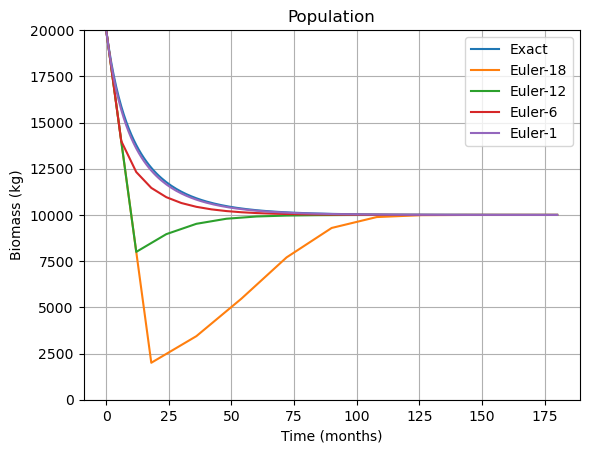

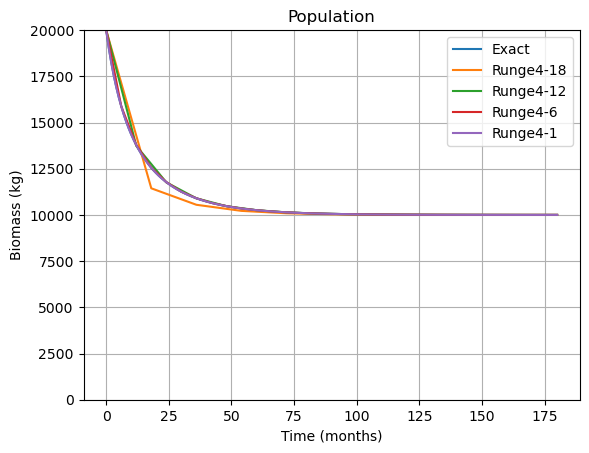

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

#  Use month as timeunit.

starttime = 0
endtime = 12*15

K = 10000   # K = 10000 kg


r = 0.6/12  # 0.71/12 was used in the Boyce & DiPrima book (unit per time)

N0 = 20000 # Initial  biomass in kg

def yexact(t,tend,dt,r,K,N0):
    YExact=[]
    T=[]
    YExact.append(N0)
    T.append(t)
      
    while t<endtime:
        dt= min(dt,tend-t)
        t = t+dt
        y=N0*K/(N0+(K-N0)*math.exp(-r*t))
        
        T.append(t)
        YExact.append(y)
        
    return T,YExact

def yeuler(t,tend,dt,r,K,y):
    Y=[]
    T=[]
    Y.append(y)
    T.append(t)
    
    while t<endtime:
        dt= min(dt,tend-t)
        t = t+dt
        
        y = y+dt*(r*(1-y/K)*y)  # Euler method
        if y<0:
            y=0
        
        T.append(t)
        Y.append(y)
    
    return T,Y

def yrunge(t,tend,dt,r,K,y):
    
    Y=[]
    T=[]
    Y.append(y)
    T.append(t)
    
    while t<endtime:
        dt= min(dt,tend-t)
        t = t+dt
        

        K0=dt*r*(1-y/K)*y
        K1=dt*r*(1-(y+0.5*K0)/K)*(y+0.5*K0)
        K2=dt*r*(1-(y+0.5*K1)/K)*(y+0.5*K1)
        K3=dt*r*(1-(y+K2)/K)*(y+K2)
    
        y = y+1/6*(K0+2*K1+2*K2+K3)
        
        if y<0:
            y=0
     
        T.append(t)
        Y.append(y)
    
    return T,Y
    
    
   
Tex,Nex = yexact(starttime,endtime,1,r,K,N0)
TE1,YE1 = yeuler(starttime,endtime,18,r,K,N0)
TE2,YE2 = yeuler(starttime,endtime,12,r,K,N0)
TE3,YE3 = yeuler(starttime,endtime,6,r,K,N0)
TE4,YE4 = yeuler(starttime,endtime,1,r,K,N0)

plt.plot(Tex,Nex)
plt.plot(TE1,YE1)
plt.plot(TE2,YE2)
plt.plot(TE3,YE3)
plt.plot(TE4,YE4)
plt.grid(True)
labels=['Exact', 'Euler-18','Euler-12','Euler-6','Euler-1']
plt.legend(labels)
plt.title('Population')
plt.xlabel('Time (months)')
plt.ylabel('Biomass (kg)')
plt.ylim(ymin = 0,ymax = 20000)
plt.show()

# Now plot Runge Kutta.

TR1,YR1 = yrunge(starttime,endtime,18,r,K,N0)
TR2,YR2 = yrunge(starttime,endtime,12,r,K,N0)
TR3,YR3 = yrunge(starttime,endtime,6,r,K,N0)
TR4,YR4 = yrunge(starttime,endtime,1,r,K,N0)

plt.plot(Tex,Nex)
plt.plot(TR1,YR1)
plt.plot(TR2,YR2)
plt.plot(TR3,YR3)
plt.plot(TR4,YR4)
plt.grid(True)
labels=['Exact', 'Runge4-18','Runge4-12','Runge4-6','Runge4-1']
plt.legend(labels)
plt.title('Population')
plt.xlabel('Time (months)')
plt.ylabel('Biomass (kg)')
plt.ylim(ymin = 0,ymax = 20000)
plt.show()





### Alternative approach using subplots!

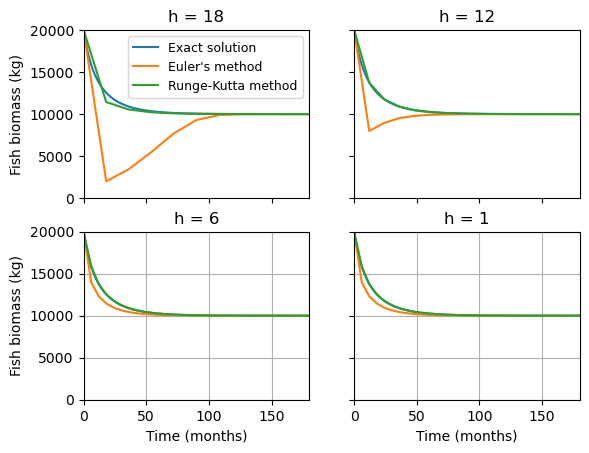

In [3]:
fig, axs = plt.subplots(2, 2, sharex = True, sharey = True)
axs[0, 0].plot(Tex, Nex, TE1, YE1, TR1, YR1)
axs[0, 0].set_title("h = 18")
axs[0, 0].legend(["Exact solution", "Euler's method", "Runge-Kutta method"], fontsize = 9)
axs[0, 1].plot(Tex, Nex, TE2, YE2, TR2, YR2)
axs[0, 1].set_title("h = 12")
axs[1, 0].plot(Tex, Nex, TE3, YE3, TR3, YR3)
axs[1, 0].set_title("h = 6")
axs[1, 0].grid(True)
axs[1, 1].plot(Tex, Nex, TE3, YE3, TR3, YR3)
axs[1, 1].set_title("h = 1")
axs[1, 1].grid(True)

for ax in axs.flat:
    ax.set(xlabel='Time (months)', ylabel='Fish biomass (kg)', ylim = (0, 20000), xlim = (0, 180))
    ax.label_outer()

plt.show()


### Exercise  1.3 - Play with the Model

Set the timestep to 1 month.  Use the following values for $N_{0}$:  0 kg, 1 kg, 2000 kg, 10000 kg, 15000 kg. Simulate 25 years ahead.  Discuss what you observe and illustrate this in you report with appropriate plots!

### Exercise 1.3 - Solution

Answer: Starting out with No=0  or No= 10000 kg give flat solutions. All other values for No will give N = K = 10000 kg in the end. Even No = 1 kg will give  N = 10000 kg  but it takes much longer time (should comment that it will take long time to grow in this case).  


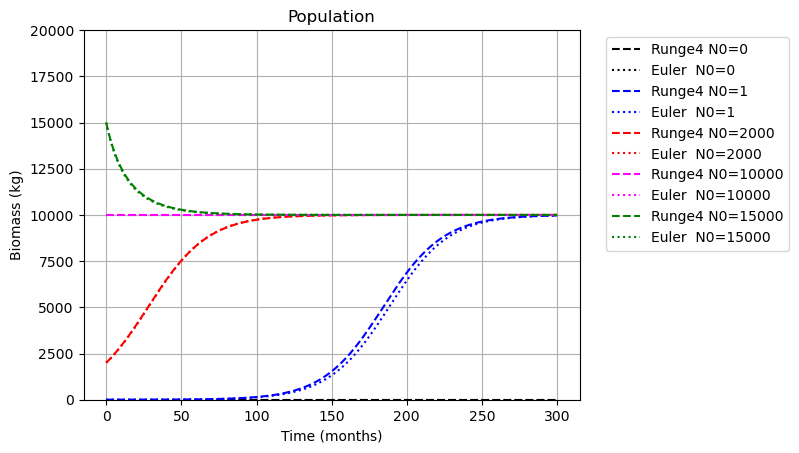

In [4]:
endtime = 12*25

TRN0,YRN0 = yrunge(starttime,endtime,1,r,K,0)
TEN0,YEN0 = yeuler(starttime,endtime,1,r,K,0)

TRN1,YRN1 = yrunge(starttime,endtime,1,r,K,1)
TEN1,YEN1 = yeuler(starttime,endtime,1,r,K,1)

TRN2,YRN2 = yrunge(starttime,endtime,1,r,K,2000)
TEN2,YEN2 = yeuler(starttime,endtime,1,r,K,2000)

TRN3,YRN3 = yrunge(starttime,endtime,1,r,K,10000)
TEN3,YEN3 = yeuler(starttime,endtime,1,r,K,10000)

TRN4,YRN4 = yrunge(starttime,endtime,1,r,K,15000)
TEN4,YEN4 = yeuler(starttime,endtime,1,r,K,15000)

plt.plot(TRN0,YRN0,label='Runge4 N0=0', color="black", linestyle="--")
plt.plot(TEN0,YEN0,label='Euler  N0=0', color="black", linestyle="dotted")

plt.plot(TRN1,YRN1,label='Runge4 N0=1', color="blue", linestyle="--")
plt.plot(TEN1,YEN1,label='Euler  N0=1', color="blue", linestyle="dotted")

plt.plot(TRN2,YRN2,label='Runge4 N0=2000', color="red", linestyle="--")
plt.plot(TEN2,YEN2,label='Euler  N0=2000', color="red", linestyle="dotted")

plt.plot(TRN3,YRN3,label='Runge4 N0=10000', color="magenta", linestyle="--")
plt.plot(TEN3,YEN3,label='Euler  N0=10000', color="magenta", linestyle="dotted")

plt.plot(TRN4,YRN4,label='Runge4 N0=15000', color="green", linestyle="--")
plt.plot(TEN4,YEN4,label='Euler  N0=15000', color="green", linestyle="dotted")



plt.legend(bbox_to_anchor=(1.04, 1))   # bbox så får vi satt legend til høyre for plottet

#labels=['Runge N0=0', 'Euler N0 = 0 ','Runge N0=1','Euler N0=1']
#plt.legend(labels)
plt.grid(True)
plt.title('Population')
plt.xlabel('Time (months)')
plt.ylabel('Biomass (kg)')
plt.ylim(ymin = 0,ymax = 20000)

plt.show()







### Exercise 1.4 - Analysis of Model

The differential equation was given as:

$$
\begin{equation}
\label{eq4} \tag{4}
\frac{dN}{dt}=r(1-\frac{N}{K})N
\end{equation}
$$

Plot the right hand side of this equation as function of N to study how $\frac{dN}{dt}$ changes as function of N. Include this in the report. What happens when $N$ = 0 and $N$ = $K$?  What does these points represent? Discuss this also in relation to what you saw from the previous simulations.

For which $N$ value will $\frac{dN}{dt}$ have its largest value and what will this value be? (Show this analytically and check expressions with numbers and the graph). Also identify from the previous time simulations where we can see the effect of this and what does this represent?






### Exercise 1.4 - Solution

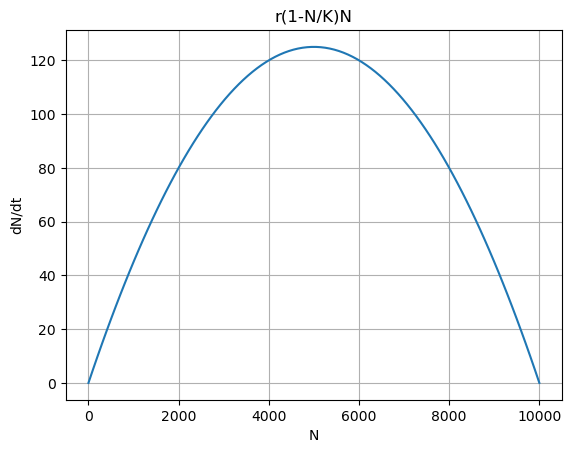

In [5]:
## section where we plot dN/dt as function of N
import numpy as np
import matplotlib.pyplot as plt
r = 0.6/12
K=10000

X = np.linspace(0,10000,100)
DNDT = r*(1-X/K)*X
plt.title('r(1-N/K)N')
plt.xlabel('N')
plt.ylabel('dN/dt')
plt.plot(X,DNDT)
plt.grid(True)

From the graph, we observe that $\frac{dN}{dt} = 0$ for $N=0$ and $N=K$. These are the equilibrium points or critical points. The first is unstable, we saw this when $N_{0}$ = 1 kg. The other is stable, so all $N_{0}>0$ will lead to a solution that converge towards $N = K$ as time increases.Full score is given if one also discuss this in relation to the value (sign) of the derivative  $dN/dt$ near the equilibrium points (not only what is seen from the simulations) 




To find the maximum point, differentiate the expression for $\frac{dN}{dt}$ with respect to $N$
and set this to zero:

$$
\begin{align}
\frac{d}{dN}(r(1-\frac{N}{K})N)&=0 \tag{9} \\
r-\frac{2rN}{K}&=0 \tag{10} \\
N &= \frac{K}{2} \tag{11} \\
\end{align}
$$

Then insert this into the expression for $\frac{dN}{dt}$ to get the maximum value for
the growth rate.

$$
\begin{equation}
H = r(1-\frac{N}{K})N=r(1-\frac{1}{2})\frac{K}{2}=\frac{rK}{4} \tag{12}
\end{equation}
$$

Inserting $r = 0.6/12$ and $K=1000$ kg gives $H = 125$ kg/month.


When dN/dt has its maximum, there will be an inflection point.  When looking at the simulation using No=1 kg, we observe the inflection point at around 180 months when N = 5000 kg. Then the growth starts to diminish after having been increasing.. 

### Exercise 1.5 - Harvesting the Fish Population

We will now introduce a term H in our original model to study the effect when we take out a certain number of fish every month. 

$$
\begin{equation}
\label{eq5} \tag{5}
\frac{dN}{dt}=r(1-\frac{N}{K})N, \qquad  N(0)=N_0
\end{equation}
$$

where $K = \frac{r}{a}$. $K$ has same unit as $N$. $H$ has unit kg/month.
Implement this in your previous simulation framework where you use the Euler method or the fourth order Runge-Kutta method with an appropriate timestep. Test the following values: $H$ = 50, 100, 120, 150 kg/month. 
Use both  $N_{0}$ =5000 kg, $N_{0}$=15000 kg.  
Present and discuss what you observe. Choose appropriate plots for illustration. Also remember to include this code in the report notebook.






### Exercise 1.5 - Solution

In the code below, we use a loop across H and plot for each repetition of the loop.

In [6]:
# Here we define new functions

def yeulerharvest(t,tend,dt,r,K,y,H):
    Y=[]
    T=[]
    Y.append(y)
    T.append(t)
    
    while t<tend:
        dt= min(dt,tend-t)
        t = t+dt
        
        y = y+dt*(r*(1-y/K)*y-H)  # Euler method
        if y<0:
            y=0
        
        T.append(t)
        Y.append(y)
    
    return T,Y

def yrungeharvest(t,tend,dt,r,K,y,H):
    
    Y=[]
    T=[]
    Y.append(y)
    T.append(t)
    
    while t<tend:
        dt= min(dt,tend-t)
        t = t+dt
        

        K0=dt*(r*(1-y/K)*y-H)
        K1=dt*(r*(1-(y+0.5*K0)/K)*(y+0.5*K0)-H)
        K2=dt*(r*(1-(y+0.5*K1)/K)*(y+0.5*K1)-H)
        K3=dt*(r*(1-(y+K2)/K)*(y+K2)-H)
    
        y = y+1/6*(K0+2*K1+2*K2+K3)
        
        if y<0:
            y=0
     
        T.append(t)
        Y.append(y)
    
    return T,Y

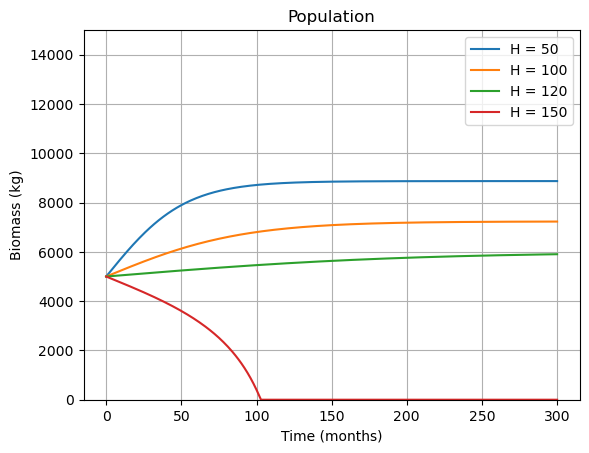

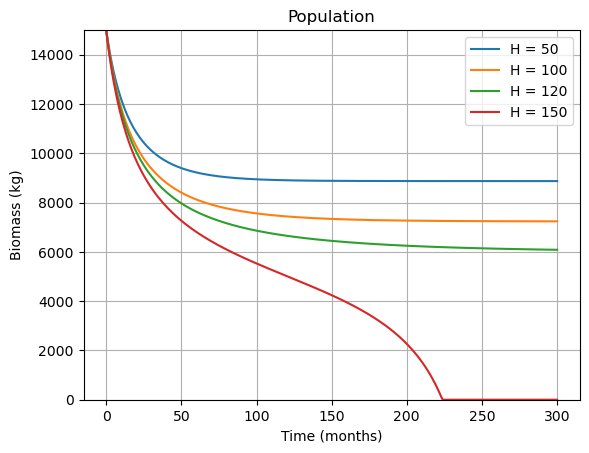

In [7]:

# Here we use the new functions to plot

N5000 = 5000
N15000 = 15000

starttime = 0
endtime = 12*25
step = 1

K = 10000   # K = 10000 kg
r = 0.6/12  # 0.71/12 was used in the Boyce & DiPrima book (unit per time)

H=[50,100,120,150]
step = 1
end = 12*25 

for i in H:
    T,Y = yrungeharvest(starttime,end,step,r,K,N5000,i)
    
    plt.plot(T,Y,label= 'H = '+ str(i))

plt.title('Population')
plt.legend()
plt.xlabel('Time (months)')
plt.ylabel('Biomass (kg)')
plt.ylim(ymin=0,ymax=15000)
plt.grid(True)    
plt.show()    


for i in H:
    T,Y = yrungeharvest(starttime,end,step,r,K,N15000,i)
    
    plt.plot(T,Y,label= 'H = '+ str(i))

plt.title('Population')
plt.legend()
plt.xlabel('Time (months)')
plt.ylabel('Biomass (kg)')
plt.ylim(ymin=0,ymax=15000)
plt.grid(True)    
plt.show()    



## Alternative approach for plotting using enumerate

By using enumerate we have an iteration where we both have access to the index but also the value
of the item in the array when using Pythons special for loop. The code below also shows how we then can use this
to access som predefined colors in an array when performing the loop. We also se how we in this case use an f string to define the label

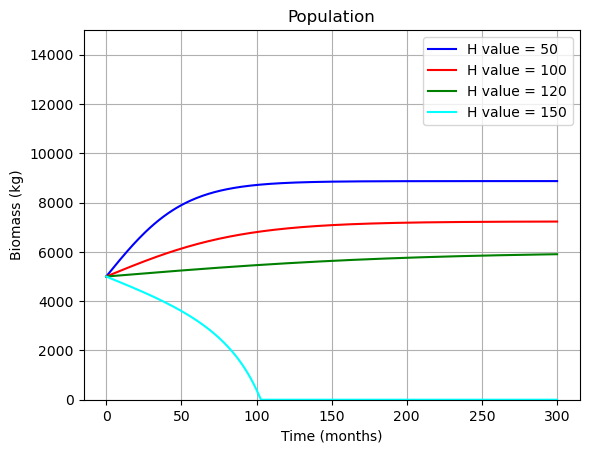

In [8]:
#h_values = [18,12,6,1]
#colors = ['b', 'r', 'g', 'c']

#for i, h_value in enumerate(h_values):
#    T1, YExact, YEuler, Yrunge4 = simulate(h_value)
#    plt.plot(T1, YEuler, color=colors[i], linestyle='-', label=f"Euler h={h_value}")
#    plt.plot(T1, Yrunge4, color=colors[i], linestyle='--', label=f"Runge4 h={h_value}")

# Add exact solution to the plot
#plt.plot(T1, YExact, color='k', linestyle='-.', label="Exact solution")


N5000 = 5000
N15000 = 15000

starttime = 0
endtime = 12*25
step = 1

K = 10000   # K = 10000 kg
r = 0.6/12  # 0.71/12 was used in the Boyce & DiPrima book (unit per time)

H=[50,100,120,150]
#colors = ['b', 'r', 'g', 'c']
colors = ["blue","red","green","cyan"]
step = 1
end = 12*25 

for i, hvalue in enumerate(H):
    T,Y = yrungeharvest(starttime,end,step,r,K,N5000,hvalue)
    
    plt.plot(T,Y,label=f"H value = {hvalue}", color=colors[i],linestyle="-")
    #plt.plot(T,Y,"o",label=f"H value = {hvalue}", color=colors[i])
plt.title('Population')
plt.legend()
plt.xlabel('Time (months)')
plt.ylabel('Biomass (kg)')
plt.ylim(ymin=0,ymax=15000)
plt.grid(True)    
plt.show()    





## Alternative approach using zip

zip virker som en utvidet spesial for løkke i Python der vi har to iteratorer som peker elementene i to lister som ligger inne 
i zip(). Aksels kompendium side 11 viser at en kan ha enda flere lister hvis en vil.

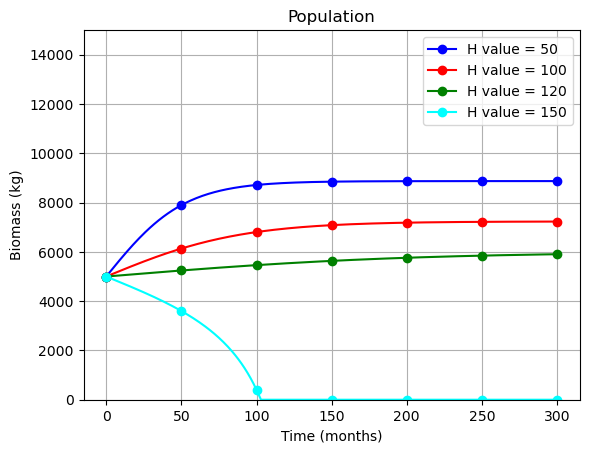

In [9]:
N5000 = 5000
N15000 = 15000

starttime = 0
endtime = 12*25
step = 1

K = 10000   # K = 10000 kg
r = 0.6/12  # 0.71/12 was used in the Boyce & DiPrima book (unit per time)

H=[50,100,120,150]
#colors = ['b', 'r', 'g', 'c']
colors = ["blue","red","green","cyan"]
step = 1
end = 12*25 

for hvalue,farge in zip(H,colors):
    T,Y = yrungeharvest(starttime,end,step,r,K,N5000,hvalue)
    
    #plt.plot(T,Y,label=f"H value = {hvalue}", color=farge,linestyle="-")
    plt.plot(T,Y,label=f"H value = {hvalue}", color=farge,marker="o",markevery=50)
plt.title('Population')
plt.legend()
plt.xlabel('Time (months)')
plt.ylabel('Biomass (kg)')
plt.ylim(ymin=0,ymax=15000)
plt.grid(True)    
plt.show()    


###  Exercise 1.6 - Determining the Maximum Sustainable Yield

There is a critical limit for how much we can harvest before the population collapses independent on how large it was initially. 
Show that this critical limit which we name Maximum Sustainable Yield is defined by $H_{MSY}=\frac{rK}{4} = 125$ kg/month.





### Exercise 1.6 - Solution

$$
\begin{align}
\frac{dN}{dt} &= r(1-\frac{N}{K})N - H \tag{6} \\
0 &= r(1-\frac{N}{K})N - H \tag{7} \\
H &= r(1-\frac{N}{K})N \tag{8} \\
\end{align}
$$

$H$ will have its maximum value when the RHS has its maximum value. I.e. we need to find the maximum point of 
$r(1-\frac{N}{K})N$.

$$
\begin{align}
\frac{d}{dN}(r(1-\frac{N}{K})N)&=0 \tag{9} \\
r-\frac{2rN}{K}&=0 \tag{10} \\
N &= \frac{K}{2} \tag{11} \\
\end{align}
$$

$$
\begin{align}
&\frac{d}{dN}(r(1-\frac{N}{K})N)=0 \tag{9} \\
&r-\frac{2rN}{K}=0 \tag{10} \\
&N = \frac{K}{2} \tag{11}
\end{align}
$$

Insert $N = \frac{K}{2}$ into $r(1-\frac{N}{K})N$ gives:


$$
\begin{equation}
H = r(1-\frac{N}{K})N=r(1-\frac{1}{2})\frac{K}{2}=\frac{rK}{4} \tag{12}
\end{equation}
$$

Inserting $r = 0.6/12$ and $K=1000$ kg gives $H = 125$ kg/month.

If the $H$ value is larger than this, the derivative $\frac{dN}{dt}$ will become negative for all values of N. To get full score one should show the derivation of the max point. If this is already done for question 1p4, it is ok.

But some score will also be given if one only argue graphically and state 
that the derivative becomes negative for all $N$ when $H$ > 125 kg/month.



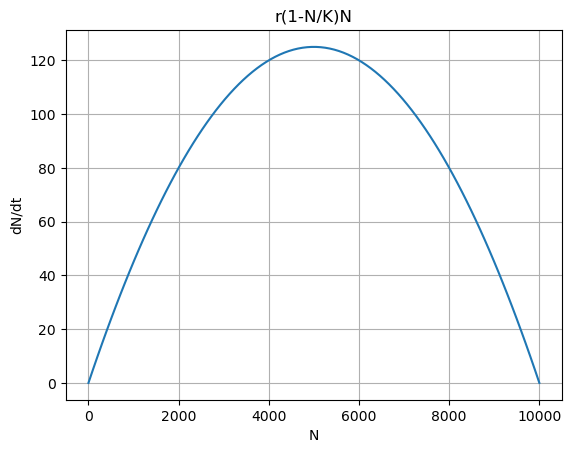

In [10]:
## section where we plot dN/dt as function of N
import numpy as np
import matplotlib.pyplot as plt
r = 0.6/12
K=10000

X = np.linspace(0,10000,100)
DNDT = r*(1-X/K)*X
plt.title('r(1-N/K)N')
plt.xlabel('N')
plt.ylabel('dN/dt')
plt.plot(X,DNDT)
plt.grid(True)

### Exercise 1.7 - Equilibrium Points for the Case where $H < rk/4$

Show analytically that there are two equilibrium points for the case where we harvest at a rate H that is lower than the maximum sustainable yield. Determine the stability of these.   Also evaluate and visualize how the value of these equilibrium points vary depending on the value of H.
Based on this, how can we say that the size of the initial population is also important for determining if a population will survive or collapse?  This you can also demonstrate by appropriate simulations and plots using e.g. H = 100 kg/month.




### Solution Exercise 1.7



$$
\begin{equation}
\frac{dN}{dt}=r(1-\frac{K}{N})N-H=0  \tag{13}
\end{equation}
$$

Then we use the abc formula for solving the quadratic polynoma in N. 

$$
\begin{equation}
-\frac{N^2}{K}+N-\frac{H}{r}=0  \tag{14}
\end{equation}
$$

$$
\begin{equation}
N_1=\frac{K}{2}(1+\sqrt{(1-\frac{4H}{rK})}, \qquad N_2=\frac{K}{2}(1-\sqrt{(1-\frac{4H}{rK})}\tag{15}
\end{equation}
$$

Below, it is shown how $N_1$ and $N_2$ vary with H.

Critical Point 1 for H = 20: 9582.57569495584
Critical Point 2 for H = 20: 417.42430504416006
Critical Point 1 for H = 40: 9123.10562561766
Critical Point 2 for H = 40: 876.8943743823398
Critical Point 1 for H = 60: 8605.55127546399
Critical Point 2 for H = 60: 1394.4487245360103
Critical Point 1 for H = 80: 7999.999999999999
Critical Point 2 for H = 80: 2000.0000000000007
Critical Point 1 for H = 100: 7236.06797749979
Critical Point 2 for H = 100: 2763.9320225002107
Critical Point 1 for H = 120: 5999.999999999999
Critical Point 2 for H = 120: 4000.000000000001
Critical Point 1 for H = 140: (5000+1732.050807568878j)
Critical Point 2 for H = 140: (5000-1732.050807568878j)


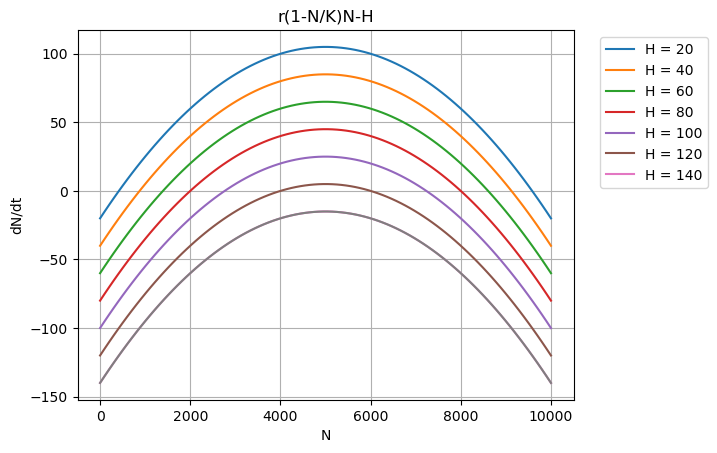

In [11]:
K = 10000
r = 0.6/12

H  = [20,40,60,80,100,120,140]

X = np.linspace(0,10000,100)

for i in H:

    N1=K/2*(1+(1-4*i/(r*K))**0.5)  # From solution in book
    N2=K/2*(1-(1-4*i/(r*K))**0.5)
    print(f'Critical Point 1 for H = {i}: {N1}')
    print(f'Critical Point 2 for H = {i}: {N2}')

    DNDT = r*(1-X/K)*X-i
    
    plt.plot(X,DNDT,label='H = '+str(i))



## section where we plot dN/dt as function of N


plt.title('r(1-N/K)N-H')
plt.xlabel('N')
plt.legend(bbox_to_anchor=(1.04, 1))
plt.ylabel('dN/dt')
plt.plot(X,DNDT)
plt.grid(True)


We  observe that $N_1$ is reduced and $N_2$ is increased in value when $H$ increases.
Assume $H$ = 100 kg/month. This gives  $N_1$ = 7236 kg.  $N_2$ = 2763 kg. Let us start out with $N_0$ = 2000 kg. $N_0$ = 2900 kg and $N_0$  = 9000 kg.


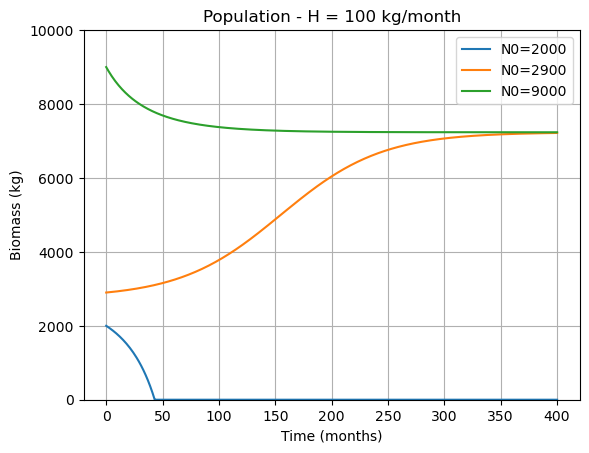

In [12]:
end = 400

T0,Y0 = yrungeharvest(starttime,end,step,r,K,2000,100)
T1,Y1 = yrungeharvest(starttime,end,step,r,K,2900,100)
T2,Y2 = yrungeharvest(starttime,end,step,r,K,9000,100)

plt.plot(T0,Y0,T1,Y1,T2,Y2)
plt.title('Population - H = 100 kg/month')
plt.xlabel('Time (months)')
plt.ylabel('Biomass (kg)')
label =['N0=2000','N0=2900','N0=9000']
plt.legend(label)
plt.grid(True)
plt.ylim(ymin=0,ymax =K)

plt.show()



### Exercise 1.8  - Harvesting at Hmsy

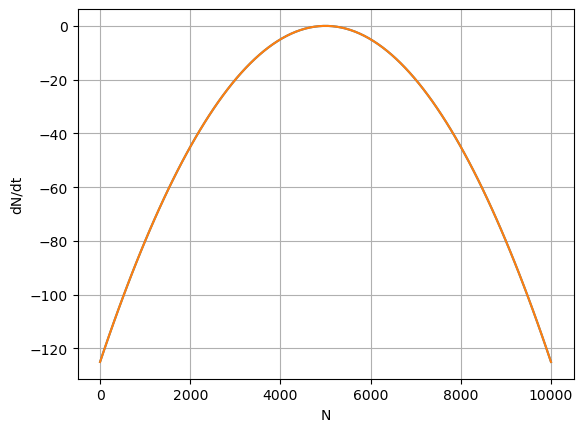

In [13]:
H = 125
X = np.linspace(0,10000,100)
DNDT = r*(1-X/K)*X-H
plt.plot(X,DNDT)
plt.xlabel('N')
plt.ylabel('dN/dt')
plt.plot(X,DNDT)
plt.grid(True)
plt.show()

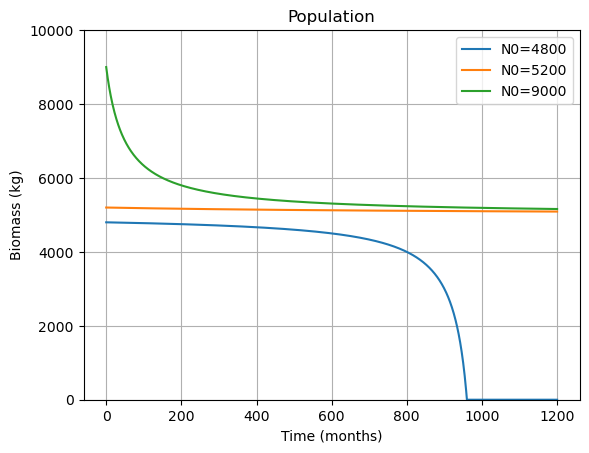

In [14]:
end = 100*12
K=10000
r = 0.6/12

T0,Y0 = yrungeharvest(starttime,end,step,r,K,4800,125)
T1,Y1 = yrungeharvest(starttime,end,step,r,K,5200,125)
T2,Y2 = yrungeharvest(starttime,end,step,r,K,9000,125)

plt.plot(T0,Y0,T1,Y1,T2,Y2)
plt.title('Population')
plt.xlabel('Time (months)')
plt.ylabel('Biomass (kg)')
label =['N0=4800','N0=5200','N0=9000']
plt.legend(label)
plt.grid(True)
plt.ylim(ymin=0,ymax =K)

plt.show()


### Exercise 1.9 - Overfishing and Collapse

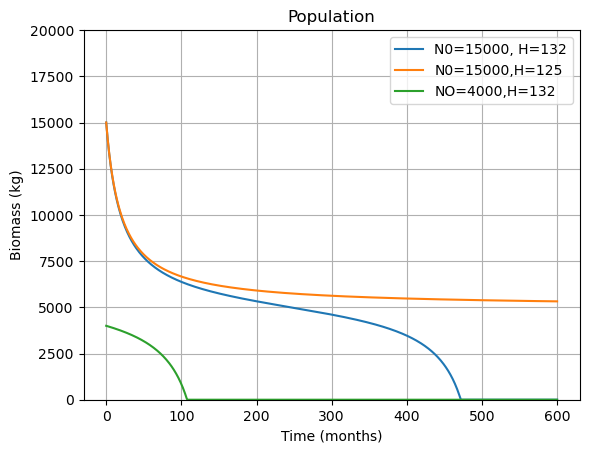

In [15]:
end = 50*12
K=10000
r = 0.6/12

T0,Y0 = yrungeharvest(starttime,end,step,r,K,15000,132)
T1,Y1 = yrungeharvest(starttime,end,step,r,K,15000, 125)
T2,Y2 = yrungeharvest(starttime,end,step,r,K,4000,132)

plt.plot(T0,Y0,T1,Y1,T2,Y2)
plt.title('Population')
plt.xlabel('Time (months)')
plt.ylabel('Biomass (kg)')
label =['N0=15000, H=132','N0=15000,H=125','NO=4000,H=132']
plt.legend(label)
plt.grid(True)
plt.ylim(ymin=0,ymax =20000)

plt.show()



### Exercise 1.10 Management and Intervention

In [16]:
def yrungeintervention(t,tend,dt,r,K,y,H,interventiontime,Hnew):
    
    Y=[]
    T=[]
    Y.append(y)
    T.append(t)
    
    while t<tend:
        dt= min(dt,tend-t)
        t = t+dt
        
        if t>=interventiontime:
             H = Hnew 
                
        

        K0=dt*(r*(1-y/K)*y-H)
        K1=dt*(r*(1-(y+0.5*K0)/K)*(y+0.5*K0)-H)
        K2=dt*(r*(1-(y+0.5*K1)/K)*(y+0.5*K1)-H)
        K3=dt*(r*(1-(y+K2)/K)*(y+K2)-H)
    
        y = y+1/6*(K0+2*K1+2*K2+K3)
        
        if y<0:
            y=0
     
        T.append(t)
        Y.append(y)
    
    return T,Y

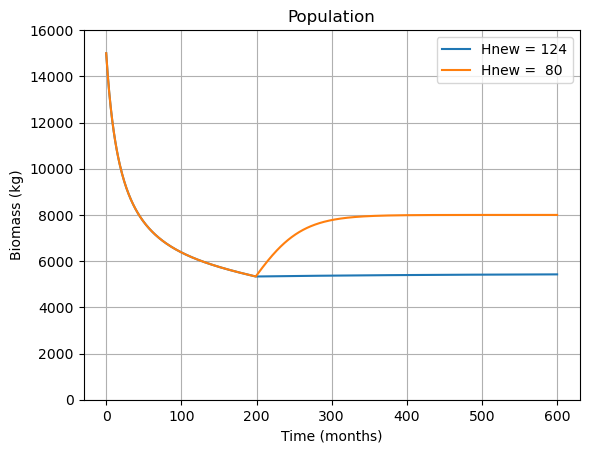

In [17]:
K =10000
r = 0.6/12
N0=15000
H=132
interventiontime=200
Hnew1=124
Hnew2=80
end =12*50

T0,Y0 = yrungeintervention(starttime,end,step,r,K,N0,H,interventiontime,Hnew1)
T1,Y1 = yrungeintervention(starttime,end,step,r,K,N0,H,interventiontime,Hnew2)

plt.plot(T0,Y0,T1,Y1)
labels = ['Hnew = ' +  str(Hnew1), 'Hnew =  ' + str(Hnew2)]
plt.legend(labels)
plt.title('Population')
plt.xlabel('Time (months)')
plt.ylabel('Biomass (kg)')
plt.grid(True)
plt.ylim(ymin=0,ymax=16000)
plt.show()




In [18]:
def yrungeinterventionalt(t,tend,dt,r,K,y,H,limit,Hnew):
    
    Y=[]
    T=[]
    Y.append(y)
    T.append(t)
    
    while t<tend:
        dt= min(dt,tend-t)
        t = t+dt
        
        if y <=limit:
            H = Hnew
                
        

        K0=dt*(r*(1-y/K)*y-H)
        K1=dt*(r*(1-(y+0.5*K0)/K)*(y+0.5*K0)-H)
        K2=dt*(r*(1-(y+0.5*K1)/K)*(y+0.5*K1)-H)
        K3=dt*(r*(1-(y+K2)/K)*(y+K2)-H)
    
        y = y+1/6*(K0+2*K1+2*K2+K3)
        
        if y<0:
            y=0
     
        T.append(t)
        Y.append(y)
    
    return T,Y

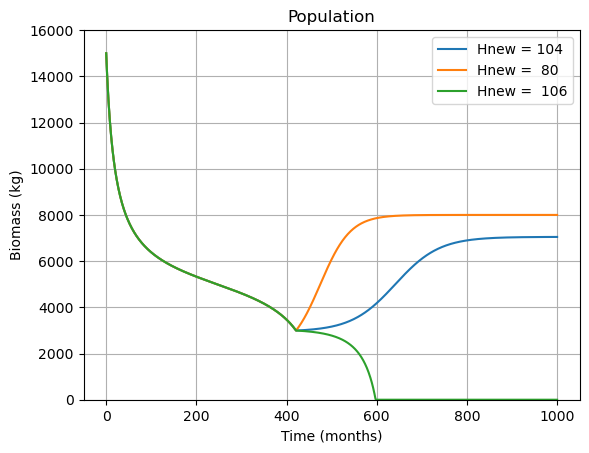

In [19]:
K =10000
r = 0.6/12
N0=15000
H=132
limit=3000
Hnew1=104
Hnew2=80
Hnew3=106
end =1000


T0,Y0 = yrungeinterventionalt(starttime,end,step,r,K,N0,H,limit,Hnew1)
T1,Y1 = yrungeinterventionalt(starttime,end,step,r,K,N0,H,limit,Hnew2)
T2,Y2 = yrungeinterventionalt(starttime,end,step,r,K,N0,H,limit,Hnew3)

plt.plot(T0,Y0,T1,Y1,T2,Y2)
labels = ['Hnew = ' +  str(Hnew1), 'Hnew =  ' + str(Hnew2),'Hnew =  ' + str(Hnew3)]
plt.legend(labels)
plt.title('Population')
plt.xlabel('Time (months)')
plt.ylabel('Biomass (kg)')
plt.grid(True)
plt.ylim(ymin=0,ymax=16000)
plt.show()


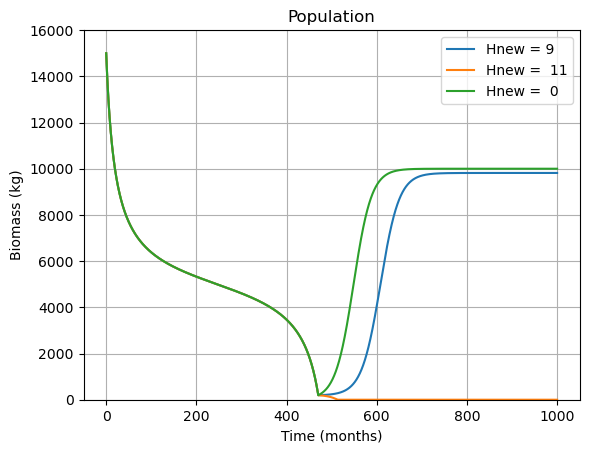

In [20]:
K =10000
r = 0.6/12
N0=15000
H=132
limit=200
Hnew1=9
Hnew2=11
Hnew3=0
end =1000
step =  0.1


T0,Y0 = yrungeinterventionalt(starttime,end,step,r,K,N0,H,limit,Hnew1)
T1,Y1 = yrungeinterventionalt(starttime,end,step,r,K,N0,H,limit,Hnew2)
T2,Y2 = yrungeinterventionalt(starttime,end,step,r,K,N0,H,limit,Hnew3)

plt.plot(T0,Y0,T1,Y1,T2,Y2)
labels = ['Hnew = ' +  str(Hnew1), 'Hnew =  ' + str(Hnew2),'Hnew =  ' + str(Hnew3)]
plt.legend(labels)
plt.title('Population')
plt.xlabel('Time (months)')
plt.ylabel('Biomass (kg)')
plt.grid(True)
plt.ylim(ymin=0,ymax=16000)
plt.show()


### References

1. <div id="1"></div> Kiusalaas, J. 2013. Numerical Methods in Engineering with Python 3. https://bibsys-ur.alma.exlibrisgroup.com/leganto/readinglist/citation/6166275760002208?auth=SAML.


2. <div id="2"></div> Hiorth, A. 2022.  Modeling and Computational Engineering
    
3. <div id="3"></div>  Boyce,W.E. and DiPrima, R.C. 1986. Elementary Differential Equations and Boundary Value Problems. Fourth Edition. John Wiley & Sons   
